# Getting Startted with Keras
modified from https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py

## Prepare dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
#train and test using cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

#Preprocessing
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

num_classes = 10

# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

/home/wangj/anaconda3/envs/DLiES/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject
  return f(*args, **kwds)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Check dataset

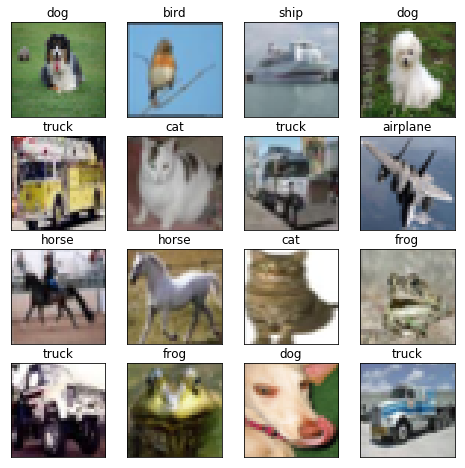

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8,8))
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

for i in range(16):
    plt.subplot(4, 4, 1 + i, xticks=[], yticks=[])
    img_id = np.random.randint(50000)
    im = x_train[img_id,::]
    plt.title(class_names[y_train[img_id].argmax()])
    plt.imshow(im)
plt.show()

## Create a model

In [4]:
#The Sequential model is a linear stack of layers.
model = tf.keras.Sequential()

## Add layers

In [5]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
#You can also simply add layers via the .add() method
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:],
                 activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same',activation='relu') )
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu') )
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu') )
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu') )
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax') )

In [6]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation (Activation)      (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
__________

## Initiate optimizer

In [7]:
opt = tf.keras.optimizers.Adam()

## Configure model

In [8]:
#Before training a model, you need to configure the learning process, which is done via the compile method.
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

## Train model

In [9]:
#Keras models are trained on Numpy arrays of input data and labels.
#For training a model, you will typically use the fit function. 
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    shuffle=True)

Epoch 1/10
50000/50000 [==============================] - 21s 424us/step - loss: 1.5485 - acc: 0.4335
Epoch 2/10
50000/50000 [==============================] - 14s 285us/step - loss: 1.1393 - acc: 0.5926
Epoch 3/10
50000/50000 [==============================] - 14s 283us/step - loss: 0.9782 - acc: 0.6532
Epoch 4/10
50000/50000 [==============================] - 14s 277us/step - loss: 0.8747 - acc: 0.6925
Epoch 5/10
50000/50000 [==============================] - 14s 281us/step - loss: 0.8105 - acc: 0.7142
Epoch 6/10
50000/50000 [==============================] - 14s 277us/step - loss: 0.7452 - acc: 0.7386
Epoch 7/10
50000/50000 [==============================] - 14s 278us/step - loss: 0.7060 - acc: 0.7504
Epoch 8/10
50000/50000 [==============================] - 14s 276us/step - loss: 0.6683 - acc: 0.7654
Epoch 9/10
50000/50000 [==============================] - 13s 266us/step - loss: 0.6360 - acc: 0.7778
Epoch 10/10
50000/50000 [==============================] - 14s 273us/step - loss: 

## Test model 

In [10]:
# test trained model.
scores = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 114us/step
Test loss: 0.6621272174358368
Test accuracy: 0.7711


## Check predictions

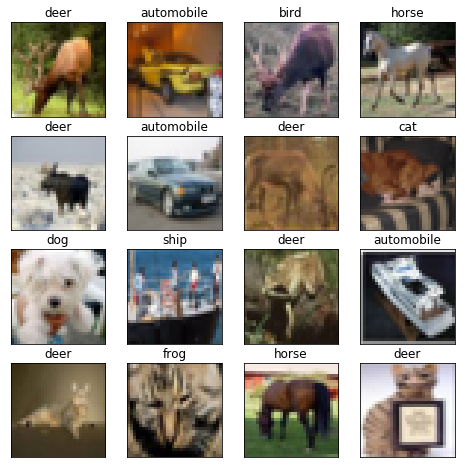

In [11]:
preds = model.predict(x_test)
plt.figure(figsize=(8,8))

for i in range(16):
    plt.subplot(4, 4, 1 + i, xticks=[], yticks=[])
    img_id = np.random.randint(10000)
    im = x_test[img_id,::]
    plt.title(class_names[preds[img_id].argmax()])
    plt.imshow(im)
plt.show()

## Save model

In [12]:
import os
save_dir = '/home/wangj/DLiES'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_name = 'keras_save_test'   
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/wangj/DLiES/keras_save_test 
